In [2]:
import sys
!{sys.executable} -m pip install vaderSentiment

In [3]:
import sys
!{sys.executable} -m pip install nltk

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
import multiprocessing as mp
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import word_tokenize
from nltk.util import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#% matplotlib inline

In [5]:
def sentiment_analyzer_scores(sentence):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(sentence)
    return score

In [6]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [7]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [12]:
filename = ['sentiment_amazon_category/sentiment_amazon_category_{}.tsv'.format(k) for k in range(1,501)]
for file in filename:
    with open(file, 'r') as f:
        next(f)
        with open('sentiment_amazon_positive.tsv','a') as p:
            with open('sentiment_amazon_negative.tsv','a') as n:
                with open('sentiment_amazon_neutral.tsv','a') as neu:
                    for i,line in enumerate(f):
                        text = line.strip().split('\t')
                        cleaned_text = text[2]
                        review_category = text[4]
                        overall = text[0]
                        if review_category == 'positive':
                            p.write(overall + '\t' + cleaned_text + '\n' )
                        elif review_category == 'negative':
                            n.write(overall + '\t' + cleaned_text + '\n' )
                        elif review_category == 'neutral':
                            neu.write(overall +'\t'+ cleaned_text + '\n' )

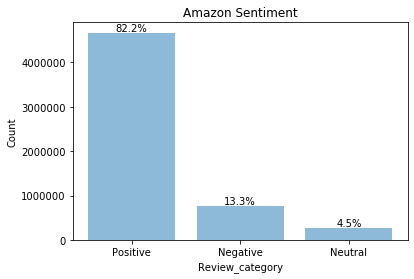

In [10]:
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots()
def count(filename):
    count = 0
    with open(filename,'r') as f:
        for line in f:
            count += 1
    return count
num_positive = count('sentiment_amazon_positive.tsv')
num_negative = count('sentiment_amazon_negative.tsv')
num_neutral = count('sentiment_amazon_neutral.tsv')
objects = ('Positive', 'Negative', 'Neutral')
y_pos = np.arange(len(objects))
performance = [num_positive, num_negative, num_neutral]

rects1 = plt.bar(y_pos, performance, align='center', alpha=0.5)
for rect in rects1:
    height = rect.get_height()
    percent = (height/(num_positive+num_negative+num_neutral))*100
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%.1f' % percent + "%", ha='center', va='bottom')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('Review_category')
plt.title("Amazon Sentiment")
plt.show()


In [14]:
num_positive

4669142

In [15]:
num_negative

754673

# ---------------------------------------------

In [22]:
# Split the sentiment_amazon_positive.tsv file 
import os

n = 4669142 # number of reviews in the file
N = 200  # spliting to 200 files
k = 0

n_per_file = int(n // N) + 1

with open('sentiment_amazon_positive.tsv', 'r') as f:
    next(f)
    g = None
    for i, line in enumerate(f):
        if i % n_per_file == 0:
            k = k + 1
            if not g == None:
                g.close()
            g = open('sentiment_amazon_positive/sentiment_amazon_positive_{}.tsv'.format(k), 'w')
            g.write("cleaned_text_positive\n")
        g.write("{}".format(line))
    g.close()

In [15]:
def graph(category, ngram, data):
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['DejaVu Sans']
    fig, ax = plt.subplots(figsize=(15, 12))
    #rcParams['figure.figsize'] = 15,12
    sns.barplot(y='words',x='freq',data=data,color= 'cyan')
    plt.ylabel('Words', size = 15)
    plt.xlabel('Frequency', size = 15)
    title ='Amazon ' + category + 'Review ' + ngram + 'Top 50'
    plt.title(title, size = 20, weight = 'bold')
    #plt.xlim([0,900000])
    #ax.tick_params(labelsize = 10)

    #xticks = [100000,200000,300000,400000,500000,600000,700000,800000,900000]
    #replace_x_ticks = ['100k','200k','300k','400k','500k','600k', '700k', '800k']
    #plt.xticks(xticks, replace_x_ticks)

In [16]:
positive = pd.read_csv('sentiment_amazon_positive_unigram.csv')

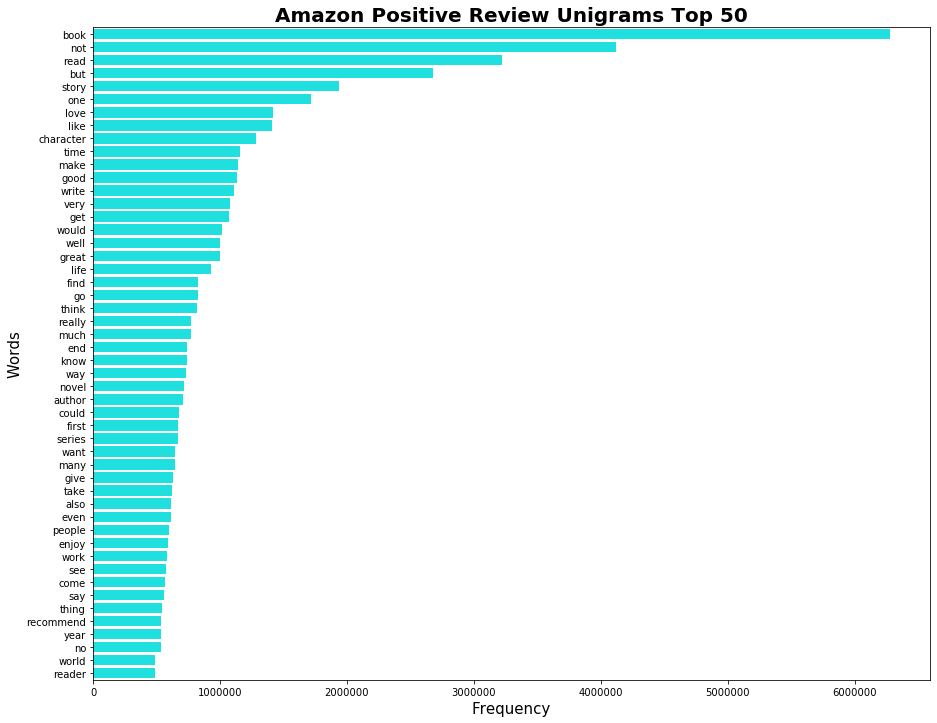

In [17]:
graph('Positive ', 'Unigrams ', positive)

In [31]:
# Split the sentiment_amazon_negative.tsv file 
import os

n = 754673 # number of reviews in the file
N = 100  # spliting to 100 files
k = 0

n_per_file = int(n // N) + 1

with open('sentiment_amazon_negative.tsv', 'r') as f:
    next(f)
    g = None
    for i, line in enumerate(f):
        if i % n_per_file == 0:
            k = k + 1
            if not g == None:
                g.close()
            g = open('sentiment_amazon_negative/sentiment_amazon_negative_{}.tsv'.format(k), 'w')
            g.write("cleaned_text_negative\n")
        g.write("{}".format(line))
    g.close()

In [18]:
negative = pd.read_csv('sentiment_amazon_negative_unigram.csv')

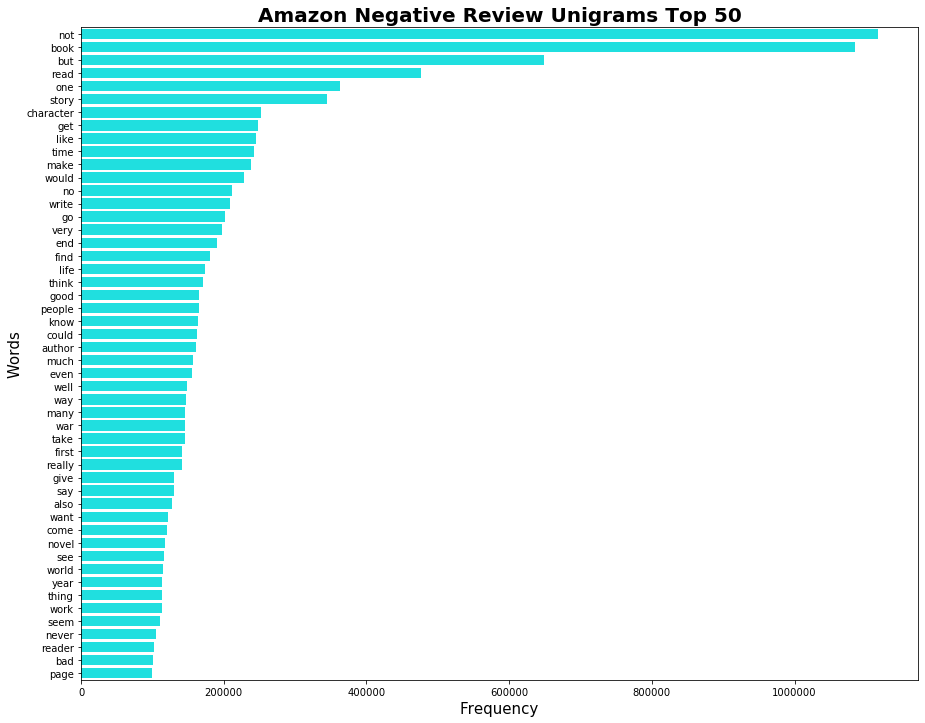

In [19]:
graph('Negative ', 'Unigrams ', negative)

=> A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams

# ----------------------------------------------
## BIAGRAM

In [20]:
positive_bigram= pd.read_csv('sentiment_amazon_positive_bigram.csv')

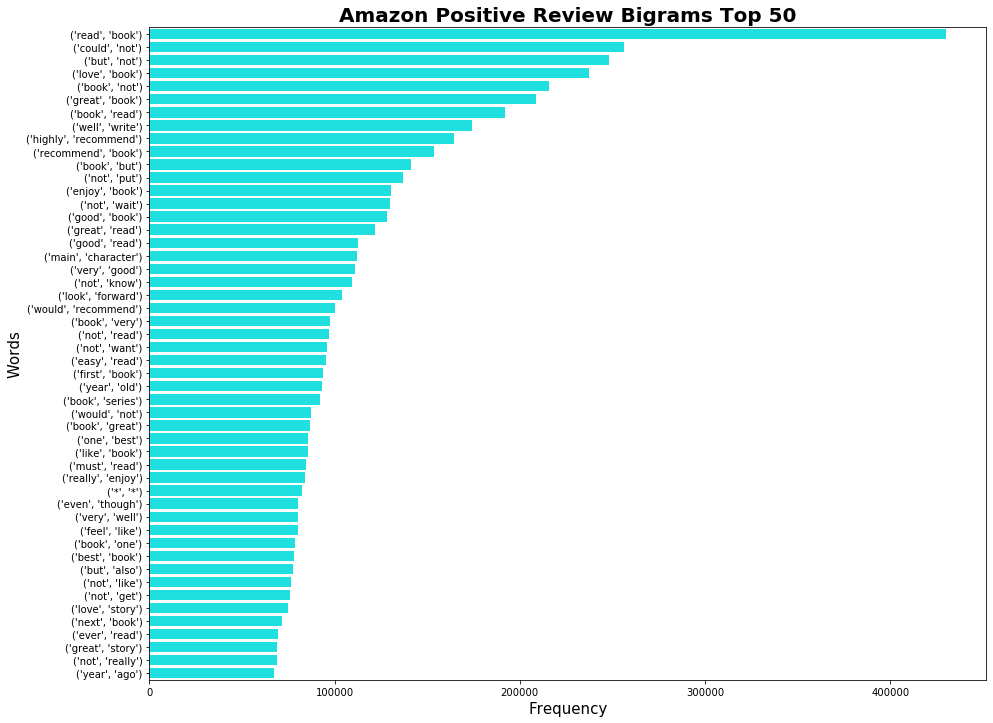

In [21]:
graph('Positive ', 'Bigrams ', positive_bigram)

In [22]:
negative_bigram= pd.read_csv('sentiment_amazon_negative_bigram.csv')

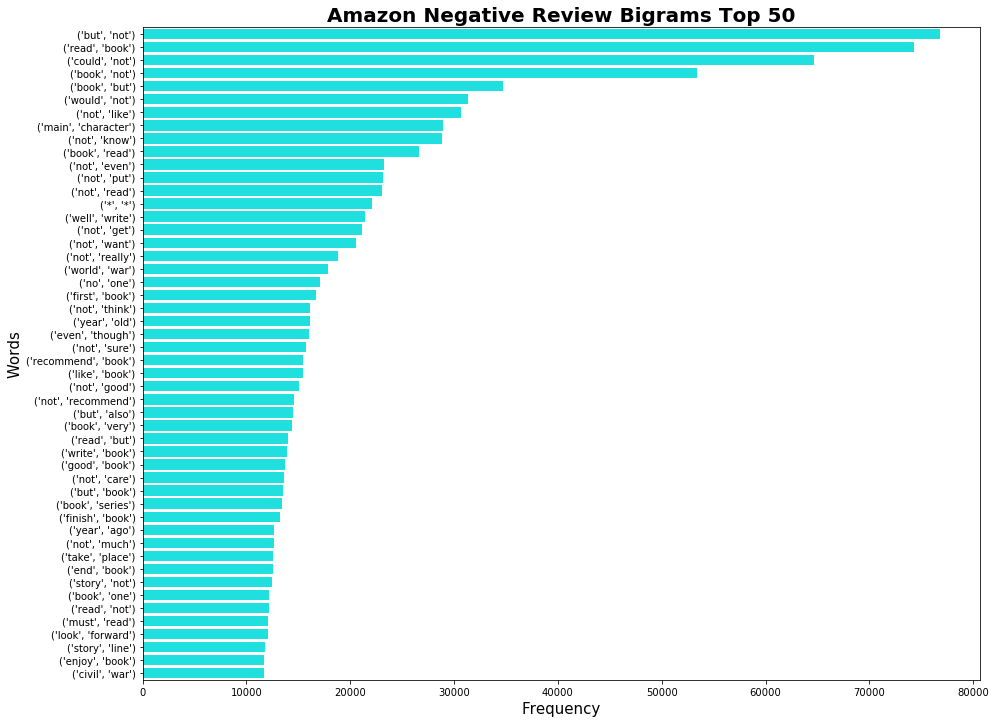

In [23]:
graph('Negative ', 'Bigrams ', negative_bigram)

# --------------------------------------------------------------------
## TRIGRAM

In [24]:
positive_trigram = pd.read_csv('sentiment_amazon_positive_trigram.csv')
positive_trigram = positive_trigram.drop(positive_trigram.index[1])
positive_trigram['words']=positive_trigram['words'].astype(str).apply(lambda st: st[st.find("(")+1:st.find(")")]).str.replace('\'','').str.replace(',','_')
positive_trigram

,words,freq
0,could_ not_ put,110785
2,highly_ recommend_ book,44678
3,book_ ever_ read,37796
4,very_ well_ write,35317
5,would_ recommend_ book,34489
6,not_ wait_ read,33332
7,one_ best_ book,33300
8,recommend_ book_ anyone,31823
9,really_ enjoy_ book,31018
10,not_ put_ book,30545


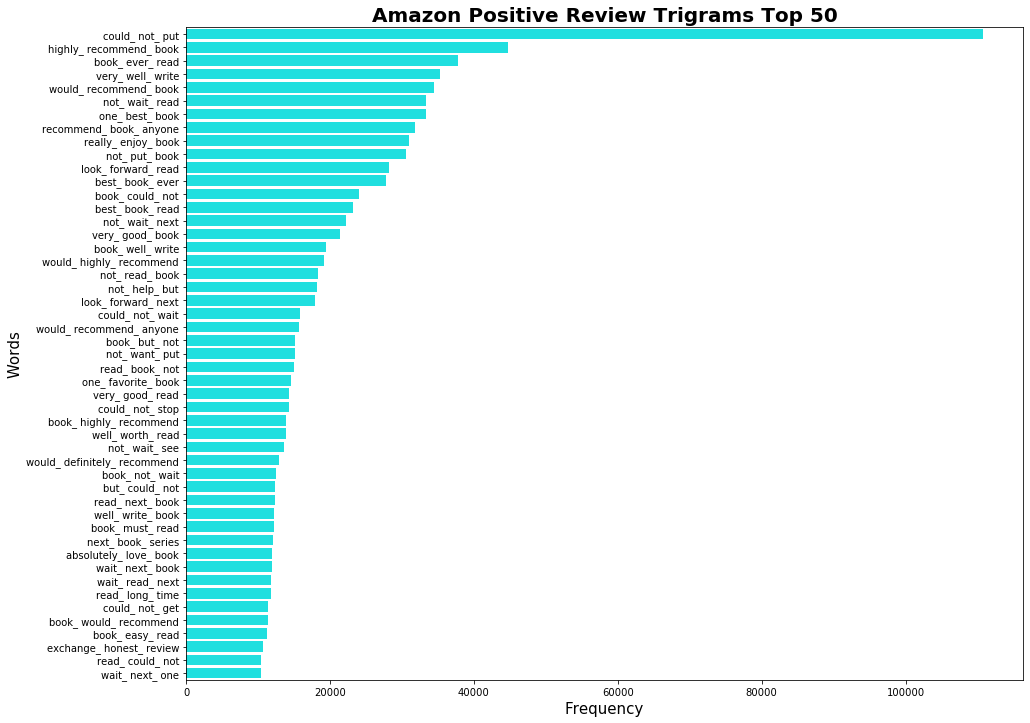

In [25]:
graph('Positive ', 'Trigrams ', positive_trigram)

In [26]:
negative_trigram = pd.read_csv('sentiment_amazon_negative_trigram.csv')

In [27]:
negative_trigram = negative_trigram.drop(negative_trigram.index[1])
negative_trigram['words']=negative_trigram['words'].astype(str).apply(lambda st: st[st.find("(")+1:st.find(")")]).str.replace('\'','').str.replace(',','_')
negative_trigram

,words,freq
0,could_ not_ put,18258
2,would_ not_ recommend,7563
3,world_ war_ ii,7474
4,book_ ever_ read,6170
5,not_ put_ book,5329
6,book_ but_ not,5204
7,not_ recommend_ book,4998
8,could_ not_ get,4763
9,not_ read_ book,4758
10,not_ help_ but,4589


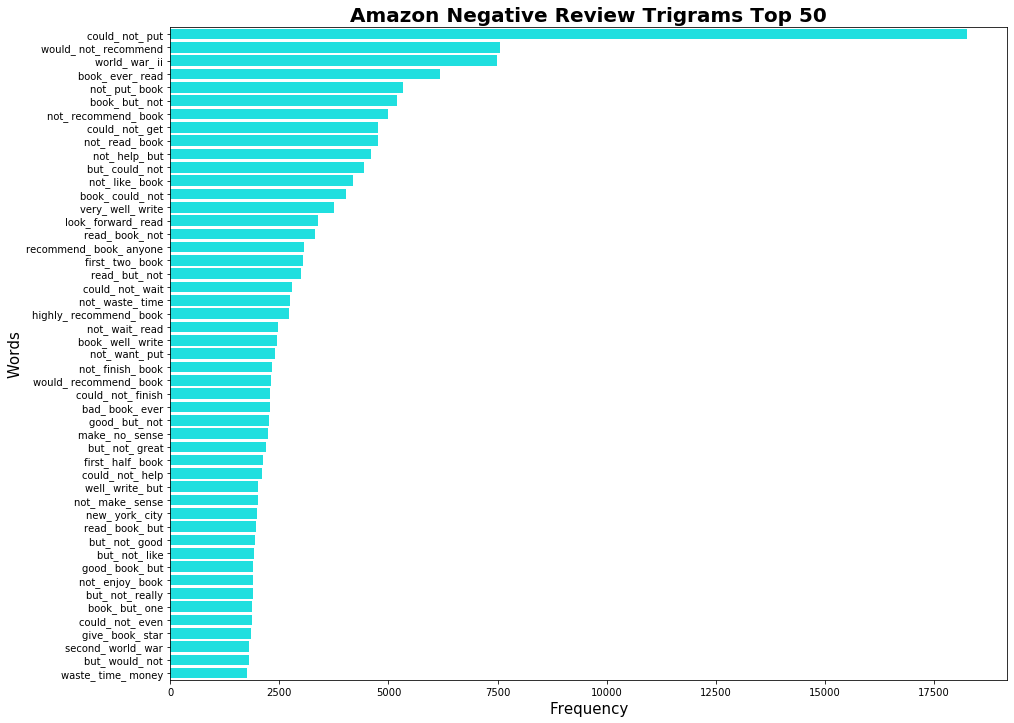

In [28]:
graph('Negative ', 'Trigrams ', negative_trigram)